Predict the Grade of the students based on the Categorical and Numerical Columns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the data

Data = pd.read_csv("StudentsPerformance.csv")
Data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#Number of rows and columns in data

Data.shape

(1000, 8)

In [7]:
Data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
Data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
Data.tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [10]:
Data.sample()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
404,female,group C,high school,standard,none,54,59,62


In [11]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
Data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
Data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
#Check the Statistics of value of Categorical Data

Data.describe(include=object)

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


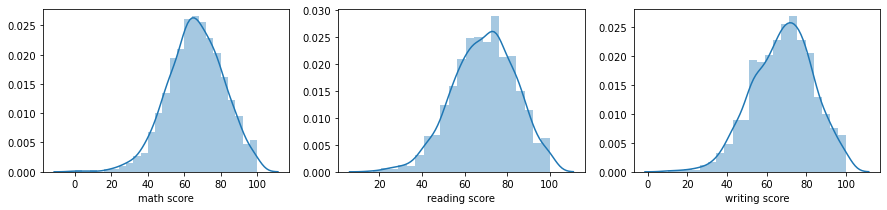

In [18]:
#Distribution of target columns (Math, Reading, Writing)

plt.rcParams['figure.figsize'] = (15,3)

plt.subplot(1,3, 1)
sns.distplot(Data['math score'])

plt.subplot(1,3, 2)
sns.distplot(Data['reading score'])

plt.subplot(1,3, 3)
sns.distplot(Data['writing score'])

plt.show()

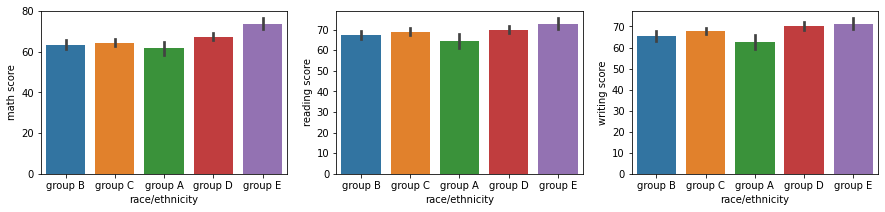

In [20]:
#Distibution of race with Target columns ( Math, Reading, Writing)

plt.rcParams['figure.figsize'] = (15,3)

plt.subplot(1,3,1)
sns.barplot(Data['race/ethnicity'], Data['math score'])

plt.subplot(1,3,2)
sns.barplot(Data['race/ethnicity'], Data['reading score'])

plt.subplot(1,3,3)
sns.barplot(Data['race/ethnicity'], Data['writing score'])

plt.show()

<AxesSubplot:>

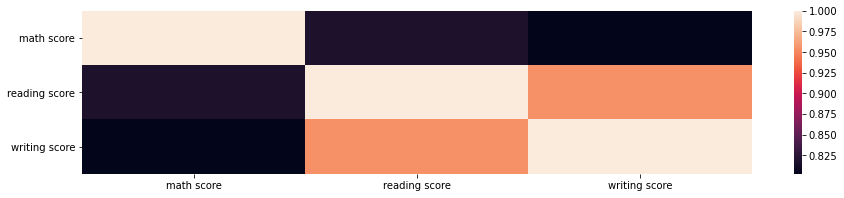

In [22]:
#Heatmap

sns.heatmap(Data.corr())

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

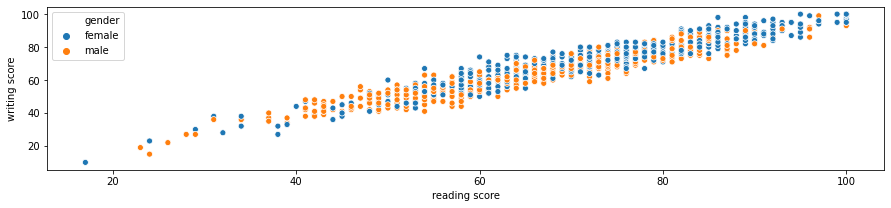

In [23]:
#Plot a bubble chart of Reading Score and Writing Score

sns.scatterplot(Data['reading score'], Data['writing score'], hue= Data['gender'])

In [28]:
# Take out the Groupby of Gender wrt Reading, Writing, and Math Score

Data[['gender','math score','reading score','writing score']].groupby(['gender']).agg('mean')

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [29]:
# Make New Features such as Total Score, Percentage of Marks, and Grade

Data['Total Score'] = Data['math score'] + Data['reading score'] + Data['writing score']
Data['Percentage'] = Data['Total Score']/3


In [30]:
Data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [31]:
#Making Grade
def getgrade(percentage):
    if percentage >=90:
        return 'O'
    if percentage >= 80:
        return 'A'
    if percentage >= 70:
        return 'B'
    if percentage >= 60:
        return 'C'
    if percentage >= 40:
        return 'D'
    else :
        return 'E'

Data['Grade'] = Data['Percentage'].apply(getgrade)
    

In [32]:
Data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,O
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,D
4,male,group C,some college,standard,none,76,78,75,229,76.333333,B


In [33]:
Data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total Score', 'Percentage', 'Grade'],
      dtype='object')

In [35]:
# Apply Label Encoder on the Categorical Columns

from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
Data['gender'] = le.fit_transform(Data['gender'])
Data['race/ethnicity'] = le.fit_transform(Data['race/ethnicity'])
Data['parental level of education'] = le.fit_transform(Data['parental level of education'])
Data['lunch']=le.fit_transform(Data['lunch'])
Data['test preparation course']=le.fit_transform(Data['test preparation course'])
Data['Grade'] = le.fit_transform(Data['Grade'])


In [36]:
Data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Percentage,Grade
0,0,1,1,1,1,72,72,74,218,72.666667,1
1,0,2,4,1,0,69,90,88,247,82.333333,0
2,0,1,3,1,1,90,95,93,278,92.666667,5
3,1,0,0,0,1,47,57,44,148,49.333333,3
4,1,2,4,1,1,76,78,75,229,76.333333,1


In [38]:
Data.select_dtypes('object').columns

Index([], dtype='object')

In [39]:
# Split the Target Column from the Data

y = Data['Grade']
x = Data.drop(['Grade'], axis=1)

print(x.shape)
print(y.shape)

(1000, 10)
(1000,)


In [40]:
#Split Data into Train, Test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(800, 10)
(800,)
(200, 10)
(200,)


In [41]:
# Apply Feature Scaling on the Dataset

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [57]:
# Apply Logistic Regression 

from sklearn.linear_model import LogisticRegression

model= LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

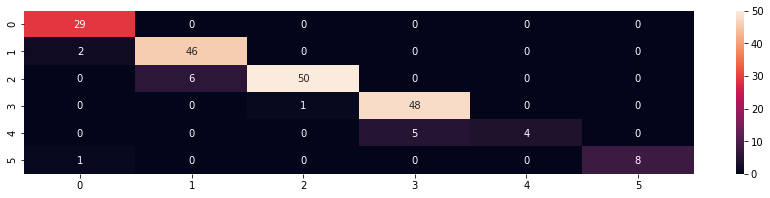

In [58]:
# Apply Confusion Matrix

from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.show()


In [59]:

from sklearn.metrics import accuracy_score
accuracy_score( y_test, y_pred)

0.925

In [60]:
#Apply Decision Tree

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

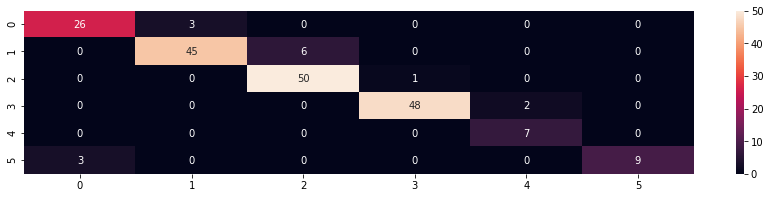

In [61]:
#Check the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot= True)

plt.show()

In [62]:

from sklearn.metrics import accuracy_score
accuracy_score( y_test, y_pred)

0.925